In [7]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

fatal: destination path 'algorithmic_complexity' already exists and is not an empty directory.


##DIFERENCIA ENTRE ALGORITMOS
La principal diferencia que existe entre estos algoritmos es que "Kruskal" es más efectivo con grafos inconexo y "Prim" es más efectivo con grafos conexos.
Debido a que, "Kruskal" utiliza un DisJoinSet para conectar los nodos separados a lo contrario que pasa con "Prim" el cual si o si necesita que todos sus nodos esten conectados de forma que sea posible formar un camino desde cualquier vértice
Para mayor comprensión pasare a definir que son cada uno de estos tipos de grafos:
  1. Grafo conexo: Decimos que un grafo es conexo, si es posible formar un camino desde cualquier vértice a cualquier otro en el grafo.
  2. Grafo inconexo: Decimos que un grafo es inconexo, si no es posible formar un camino desde cualquier vértice a cualquier otro en el grafo.

In [10]:
from algorithmic_complexity.aclib.ds import DisjointSet
from algorithmic_complexity.aclib import graphstuff as gs
import networkx as nx
from heapq import heappush as push, heappop as pop
import math

##Kruskal

In [11]:
def kruskal(G):
  n = G.number_of_nodes()
  ds = DisjointSet(n)
  edges = []
  for u, v in G.edges:
    w = G.edges[u, v]['weight']
    push(edges, (w, u, v))

  path = [-1]*n
  while edges and n > 0:
    _, u, v = pop(edges)
    if not ds.isSameSet(u, v):
      ds.union(u, v)
      if path[u] < 0:
        path[u] = v
      else:
        path[v] = u
      n -= 1

  return path

##Prim

In [12]:
def prim(G, s):
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['cost'] = math.inf
    G.nodes[u]['path'] = -1

  q = [(0, s)]
  while q:
    _, u = pop(q)
    if not G.nodes[u]['visited']:
      G.nodes[u]['visited'] = True
      for v in G.neighbors(u):
        if not G.nodes[v]['visited']:
          w = G.edges[u, v]['weight']
          if w < G.nodes[v]['cost']:
            G.nodes[v]['cost'] = w
            G.nodes[v]['path'] = u
            push(q, (w, v))

  path = [-1]*G.number_of_nodes()
  for u in G.nodes:
    path[u] = G.nodes[u]['path']

  return path

In [19]:
%%file 1.txt
0 3 2
1 0 6
1 2 3
2 0 4
2 3 5
3 1 7
3 2 3
4 3 6
4 5 3
5 5 3
5 6 4
6 5 9
6 7 2
7 6 4
7 8 3
8 7 8
8 9 6
9 8 6
9 10 4
10 9 2
10 11 3
11 10 5
11 12 5
12 11 7
12 13 5
13 12 7
13 14 6
14 13 5
14 15 7
15 14 9
15 16 8
16 15 3
16 17 4
17 16 5
17 17 6
18 17 7
18 19 8
19 18 9
19 20 3
20 19 3
20 21 3
21 20 4
21 22 5
22 21 6
22 23 7
23 22 8
23 24 9
24 23 2
24 25 5
24 24 6
25 26 7
25 25 8
26 25 9
26 27 5
27 26 4
27 28 6
28 27 7
28 29 9
29 28 3
29 30 2
30 29 9
30 0 9

Overwriting 1.txt


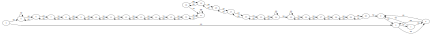

In [20]:
G2 = nx.read_weighted_edgelist("1.txt", create_using=nx.DiGraph, nodetype=int)
gs.nx2gv(G2, weighted=True)

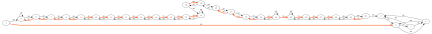

In [21]:
path = kruskal(G2)
gs.nx2gv(G2, weighted=True, path=path)

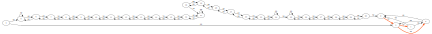

In [22]:
path = prim(G2, 0)
gs.nx2gv(G2, weighted=True, path=path)

##Diferencia entre los 2 algoritmos en terminos de tiempo y espacio
1. Kruskal: su complejidad algoritmica es logaritmica
2. Prim: su complejidad algoritmica es cuadrática